# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

Stakeholders would be the HR department.
The objective is build a model that predicts whether a person will leave a company.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [41]:
# Import packages
### YOUR CODE HERE ### 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [42]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [43]:
# Basic information
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [44]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [45]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [46]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [47]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
tenure                   False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [48]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [49]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df_dup = df0[df0.duplicated()]
df_dup.head(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [50]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head(15)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Tenure Boxplot')

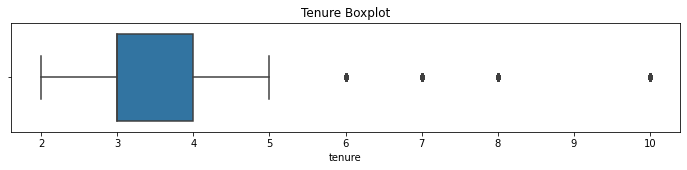

In [51]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig = plt.figure(figsize = (12, 2))
sns.boxplot(df1['tenure'])
plt.title('Tenure Boxplot', fontsize=12)

In [52]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
len(df1[df1['tenure'] > 5])


824

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [53]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print('Number of people left: ', df1['left'].sum())
print('Number of people stayed: ', len(df1) - df1['left'].sum())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print('Percent left: ', round(100*(df1['left'].sum()/len(df1)), 2), '%')
print('Percent stayed: ', round(100*((len(df1) - df1['left'].sum())/len(df1)), 2), '%')

Number of people left:  1991
Number of people stayed:  10000
Percent left:  16.6 %
Percent stayed:  83.4 %


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Tenure Histogram')

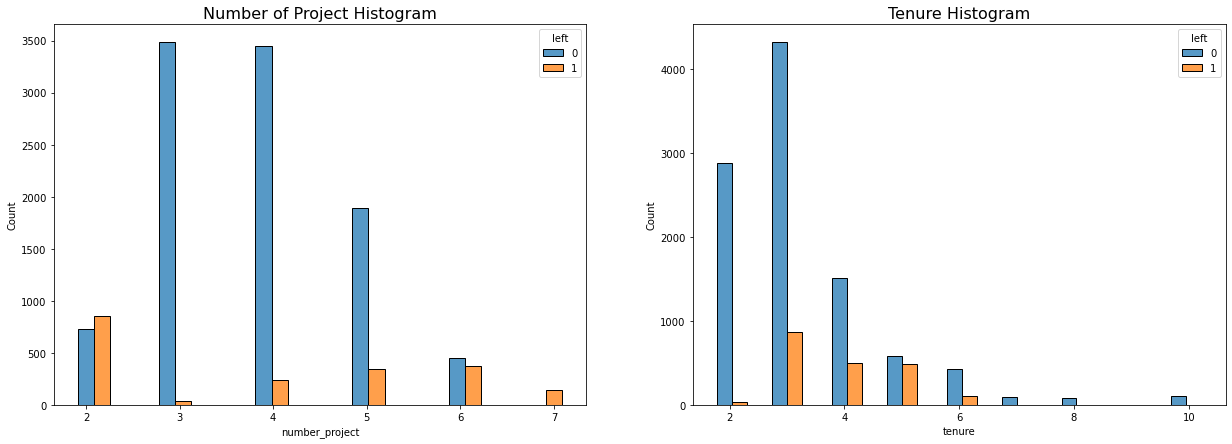

In [54]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (21, 7))
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[0])
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=6, ax=ax[1])
ax[0].set_title('Number of Project Histogram', fontsize='16')
ax[1].set_title('Tenure Histogram', fontsize='16')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

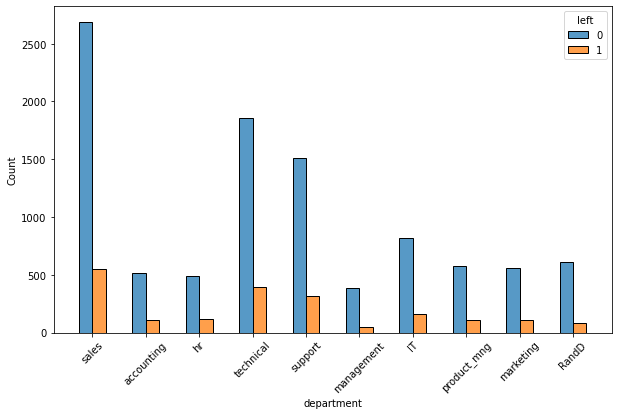

In [55]:
# Create a plot as needed
### YOUR CODE HERE ###
fig = plt.figure(figsize = (10, 6))
sns.histplot(data=df1, x='department', hue='left', multiple='dodge', shrink=.5)
plt.xticks(rotation='45')

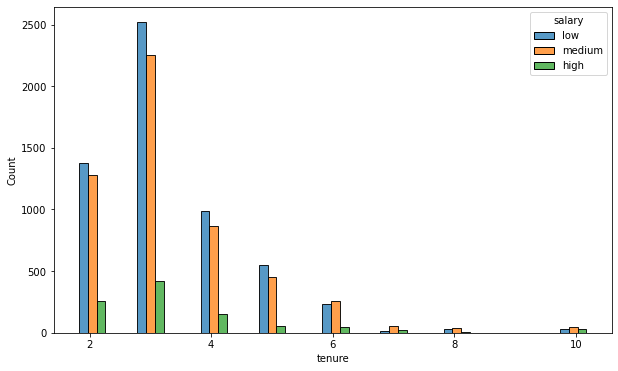

In [56]:
fig = plt.figure(figsize = (10, 6))
sns.histplot(data=df1, x='tenure', hue='salary', multiple='dodge', shrink=5)

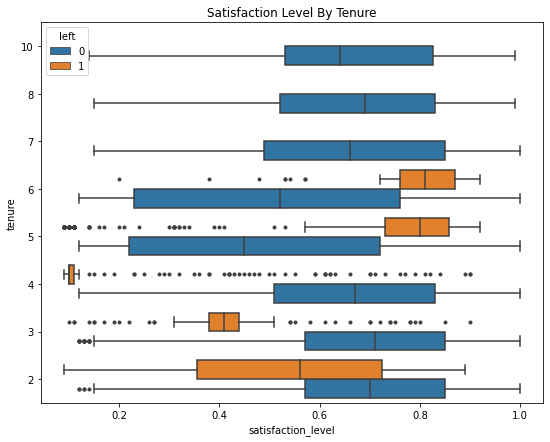

In [57]:
# Create a plot as needed
### YOUR CODE HERE ###
fig = plt.figure(figsize = (9, 7))
bx = sns.boxplot(data=df1, 
                 x='satisfaction_level', 
                 y='tenure', hue='left', 
                 orient='h', 
                 linewidth=1.5,
                 flierprops={"marker": "o", "markersize": 3})
bx.set_title('Satisfaction Level By Tenure')
bx.invert_yaxis()

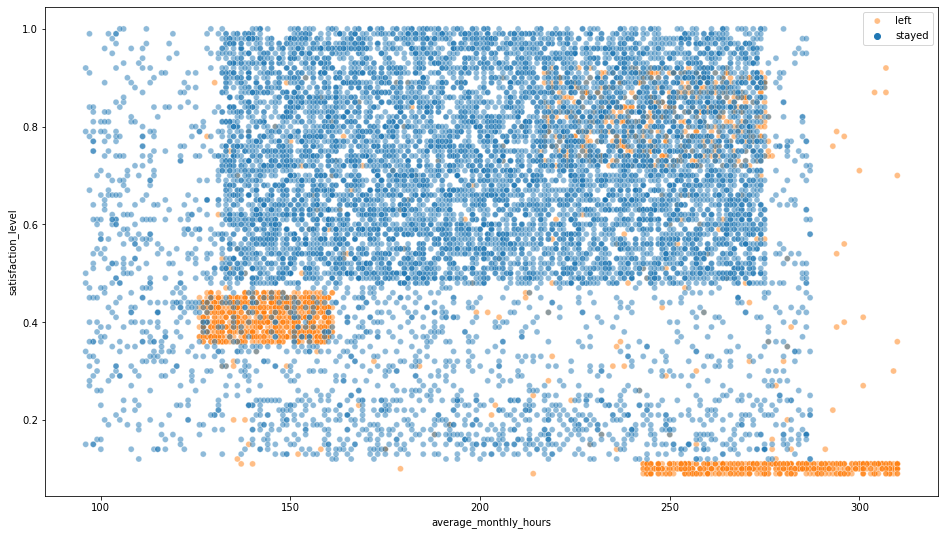

In [58]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(df1['average_monthly_hours'], df1['satisfaction_level'], hue=df1['left'], alpha = 0.5)
plt.legend(labels=['left', 'stayed'])

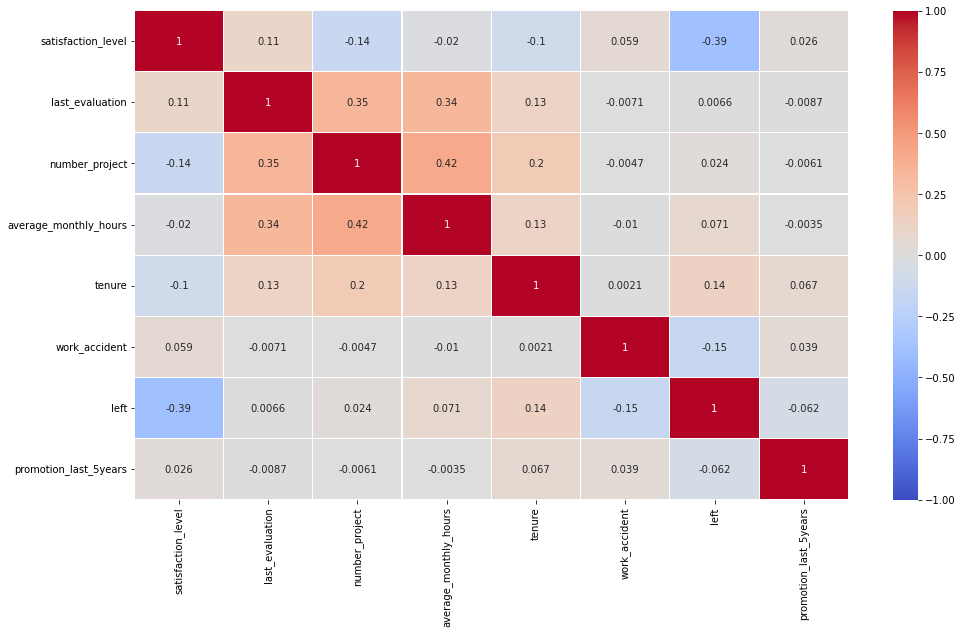

In [59]:
# Create a plot as needed
### YOUR CODE HERE ###

# correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), 
                      vmin=-1, vmax=1, 
                      annot=True, 
                      cmap=sns.color_palette("coolwarm", as_cmap=True), 
                      linewidth = 0.1)

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

## I. Logistic Regression Modeling

In [63]:
### YOUR CODE HERE ###
df_code = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_code['salary'] = (
    df_code['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_code = pd.get_dummies(df_code, drop_first=False)

# Display the new dataframe
df_code.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
# Excluding tenure outliers
df_final = df_code[(df_code['tenure'] >= 2) & (df_code['tenure'] <= 5)]

In [65]:
y = df_final['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [66]:
X = df_final.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [68]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [69]:
y_pred = log_clf.predict(X_test)

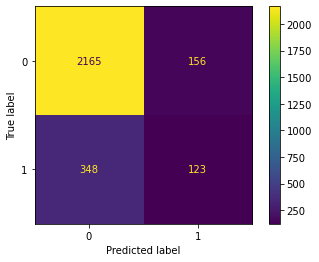

In [70]:
logreg_matrix = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

matrix_display = ConfusionMatrixDisplay(confusion_matrix=logreg_matrix, display_labels=log_clf.classes_)

matrix_display.plot(values_format='')
plt.show()

In [71]:
print(classification_report(y_test, y_pred, 
                            target_names = ['Predicted would not leave', 'Predicted would leave']))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



## II. Decision Tree Modeling

In [72]:
tr = DecisionTreeClassifier(random_state=0)

params = {
    'max_depth':range(1, 8),
    'min_samples_leaf':[2, 5, 1],
    'min_samples_split':range(2, 6)
}

scores = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tr_grid = GridSearchCV(tr, params, scoring=scores, refit='roc_auc')

In [73]:
tr_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 8),
                         'min_samples_leaf': [2, 5, 1],
                 

In [74]:
print(tr_grid.best_params_)
print(tr_grid.best_score_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9737456046840824


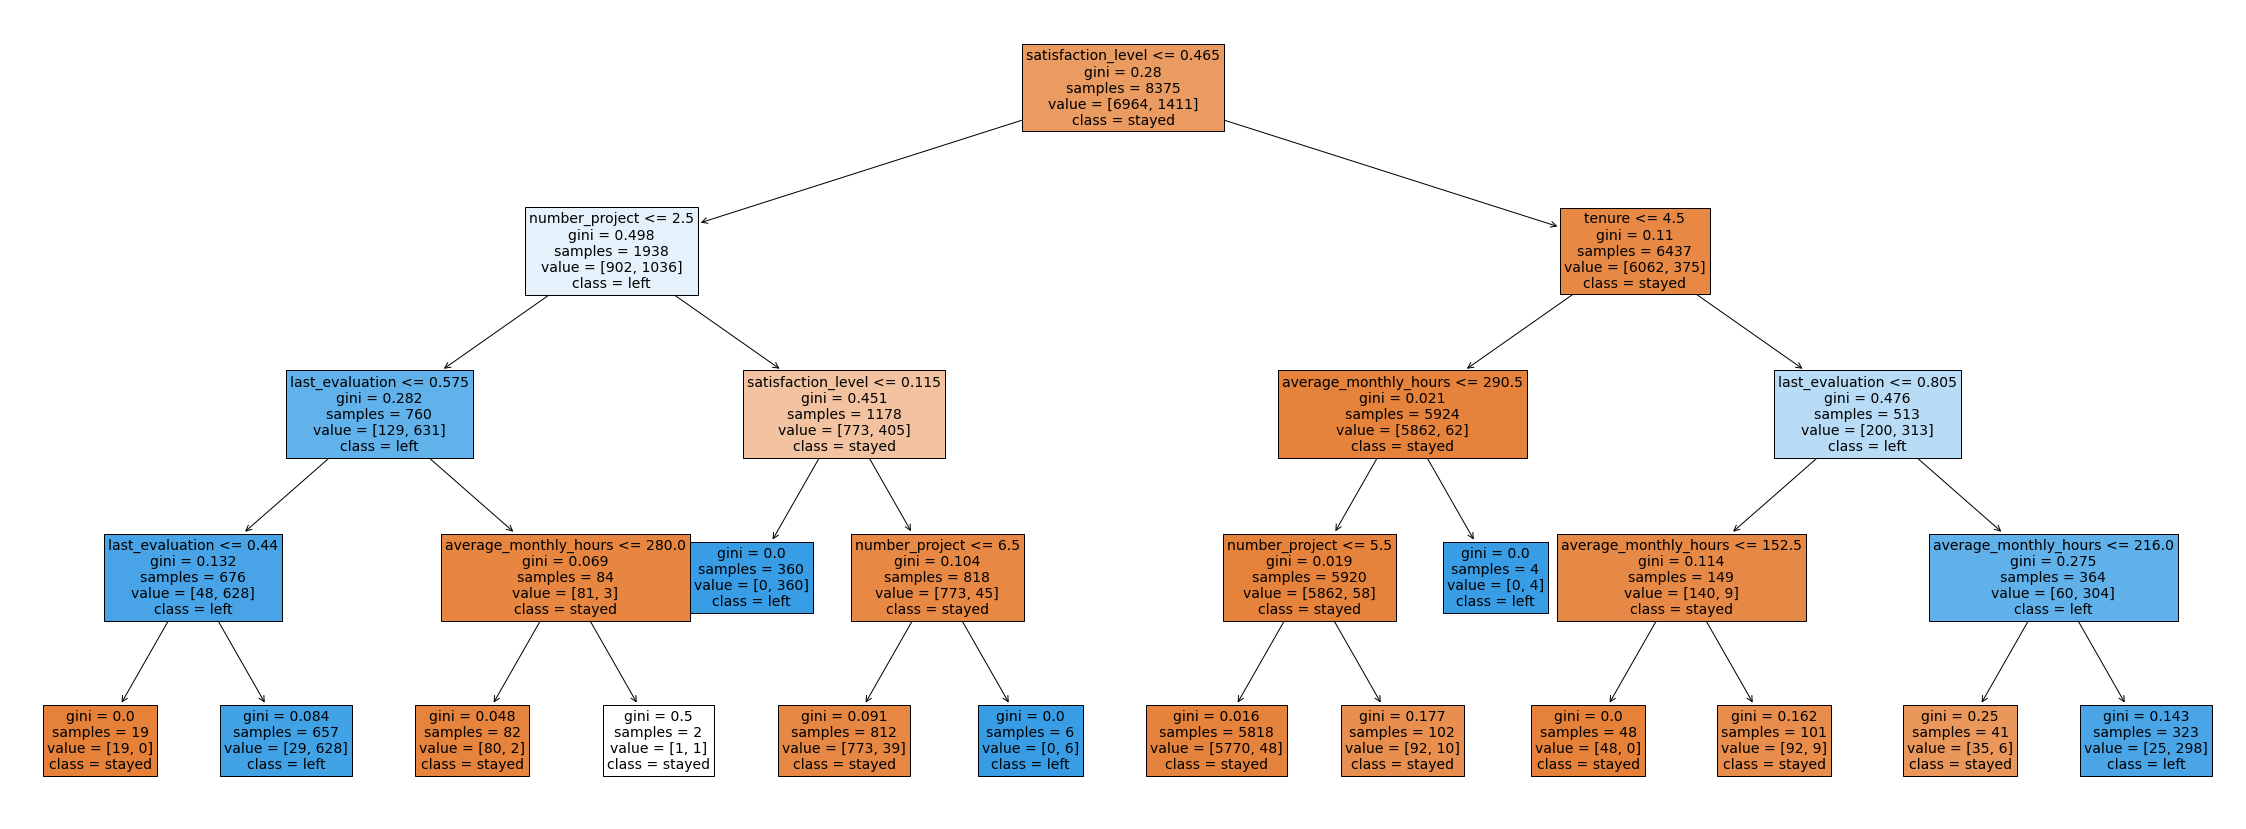

In [75]:
plt.figure(figsize=(40,15))
plot_tree(tr_grid.best_estimator_, max_depth=4, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### Plot Feature Importance

In [76]:
tr_importances = pd.DataFrame(tr_grid.best_estimator_.feature_importances_, 
                                 columns=['gini'], 
                                 index=X.columns
                                )
tr_importances = tr_importances.sort_values(by='gini', ascending=False)

# Only extract the features with importances > 0
tr_importances = tr_importances[tr_importances['gini'] != 0]
tr_importances

,gini
satisfaction_level,0.553990
tenure,0.167601
last_evaluation,0.138160
number_project,0.114046
average_monthly_hours,0.026202


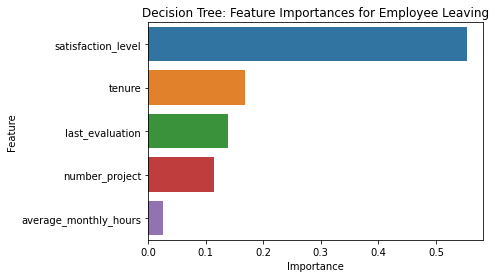

In [77]:
sns.barplot(data=tr_importances, x="gini", y=tr_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

## III. Random Forest with Feature Engineering

In [78]:
df_final['overworked'] = df_final['average_monthly_hours']

# max and min average monthly hours values
print('Max hours:', df_final['overworked'].max())
print('Min hours:', df_final['overworked'].min())

Max hours: 310
Min hours: 96


In [80]:
# Define overworked as > 175 hrs/week
df_final['overworked'] = (df_final['overworked'] > 175).astype(int)
df_final['overworked'].head()

0    0
2    1
3    1
4    0
5    0
Name: overworked, dtype: int64

In [81]:
df_final.drop('average_monthly_hours', axis=1)

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.41,0.50,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
11986,0.48,0.50,5,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
11992,0.62,0.85,3,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [83]:
y = df_final['left']

X = df_final.drop('left', axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [86]:
rand_f = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rand_grid = GridSearchCV(rand_f, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [87]:
rand_grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [88]:
print(rand_grid.best_params_)
print(rand_grid.best_score_)

{'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.981813596571596


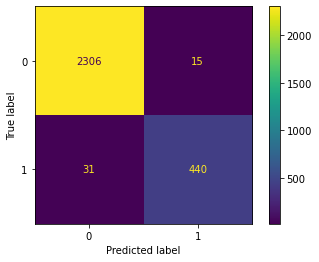

In [89]:
preds = rand_grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rand_grid.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rand_grid.classes_)
disp.plot(values_format='')